<a href="https://colab.research.google.com/github/luizapessoa/analise-dados-livros/blob/main/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insights Literários: Uma Análise de Dados de Livros com Python**
Grupo: Gabriel Aguiar, Júlia Oliveira, Lucas de Arruda, Maria Clara Estevam e Maria Luiza Pessoa

In [ ]:
# importando bibliotecas
import pandas as pd # manipulção de dados
import numpy as np # operações numericas e vetoriais
import matplotlib.pyplot as plt # visualização
import seaborn as sns # gráficos estatisticos com estilo

In [ ]:
# importando dataset
from google.colab import files
uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv


In [ ]:
# importando dados do dataset
df = pd.read_csv('bestsellers with categories.csv')


In [ ]:
# visualizando primeiras linhas do dataset
df.head(20)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [ ]:
# verificando estrutura do dataset
print(f"seu dataset tem: {df.shape[0]} linhas e {df.shape[1]} colunas")

seu dataset tem: 550 linhas e 7 colunas


In [ ]:
# nome das colunas organizadas
print(df.columns.tolist())

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


In [ ]:
# verificar dados faltantes
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [ ]:
# resumo estatistico simples
print(df.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


In [ ]:
# nota media do user rating total
media_rating= (df['User Rating'].mean())
print(media_rating)

4.618363636363637


In [ ]:
#definindo valores acima da media
acima_media = df[df['User Rating'] > media_rating]

In [ ]:
# ver nome e nota dos livros que estao acima da media
print(acima_media[['Name', 'Author', 'User Rating']])

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
6    A Game of Thrones / A Clash of Kings / A Storm...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  
0                    JJ Smith          4.7  
2          Jordan B. Peterson          4.7  
3               George Orwell          4.7  
4    National Geographic Kids          4.8  
6         George R. R. Martin          4.7  
..                        ...    

In [ ]:
# quais os 10 principais autores que tem mais livros acima da média?
acima_media['Author'].value_counts().head(10)


,count
Author,
Jeff Kinney,12
Rick Riordan,10
Gary Chapman,10
Dr. Seuss,9
Suzanne Collins,8
Eric Carle,7
Dav Pilkey,7
Don Miguel Ruiz,6
Sarah Young,6


In [ ]:
# diferença de livros acima da média por genero
acima_media['Genre'].value_counts()

,count
Genre,
Fiction,151
Non Fiction,136


In [ ]:
# ano que teve mais livros acima da media
acima_media['Year'].value_counts().head(3)

,count
Year,
2019,38
2016,35
2018,32


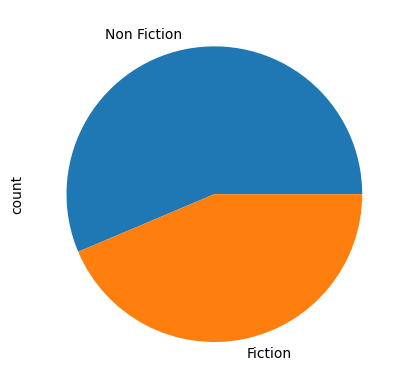

In [ ]:
# quantidade de livros por genero
df['Genre'].value_counts().plot(kind='pie')
plt.show()

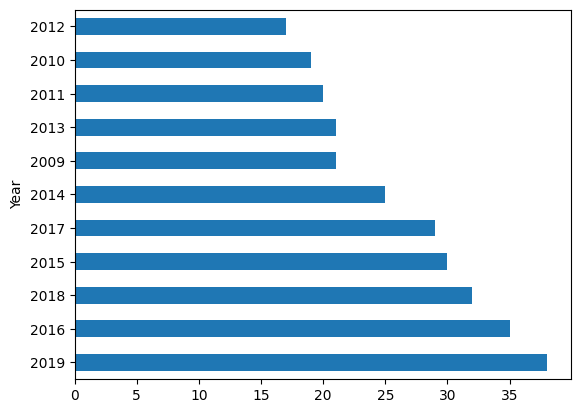

In [ ]:
# gráfico de quantidade de livros acima da média por ano
acima_media['Year'].value_counts().plot(kind='barh')
plt.show()